In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/content/sample_data/framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
df['education'].fillna(df['education'].mean(),inplace=True)

In [6]:
df['cigsPerDay'].fillna(df['cigsPerDay'].median(),inplace=True)

In [7]:
df['totChol'].fillna(df['totChol'].mean(),inplace=True)

In [8]:
df['BMI'].fillna(df['BMI'].median(),inplace=True)

In [9]:
df['glucose'].fillna(df['glucose'].mean(),inplace=True)

In [10]:
df['BPMeds'].fillna(df['BPMeds'].mean(),inplace=True)

In [11]:
df.dropna(axis=0,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4237 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4237 non-null   int64  
 1   age              4237 non-null   int64  
 2   education        4237 non-null   float64
 3   currentSmoker    4237 non-null   int64  
 4   cigsPerDay       4237 non-null   float64
 5   BPMeds           4237 non-null   float64
 6   prevalentStroke  4237 non-null   int64  
 7   prevalentHyp     4237 non-null   int64  
 8   diabetes         4237 non-null   int64  
 9   totChol          4237 non-null   float64
 10  sysBP            4237 non-null   float64
 11  diaBP            4237 non-null   float64
 12  BMI              4237 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          4237 non-null   float64
 15  TenYearCHD       4237 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 562.7 KB


<Axes: ylabel='cigsPerDay'>

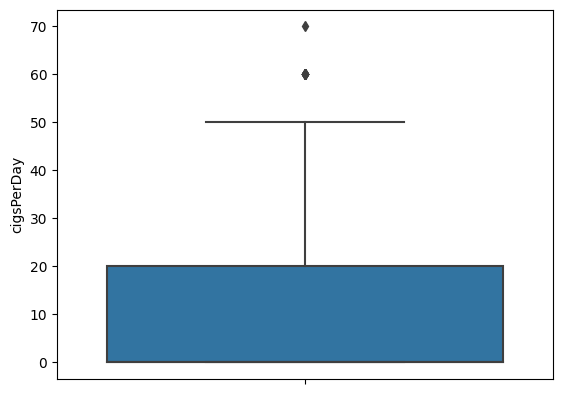

In [13]:
sns.boxplot(y=df['cigsPerDay'])

In [14]:
df.loc[df['cigsPerDay']>50,'cigsPerDay']=df.loc[df['cigsPerDay']<50,'cigsPerDay'].mean()

<Axes: ylabel='cigsPerDay'>

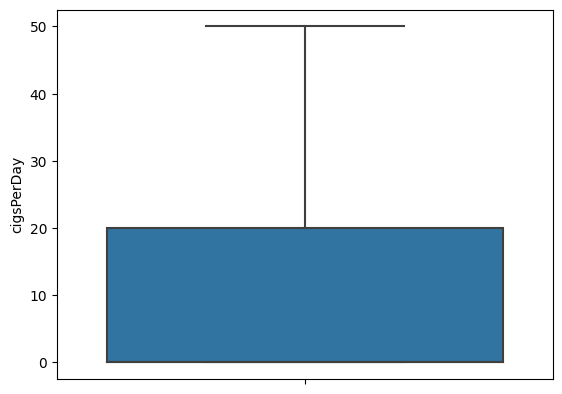

In [15]:
sns.boxplot(y=df['cigsPerDay'])

In [16]:
df['BPMeds']=np.around(df['BPMeds'],1)

<Axes: ylabel='totChol'>

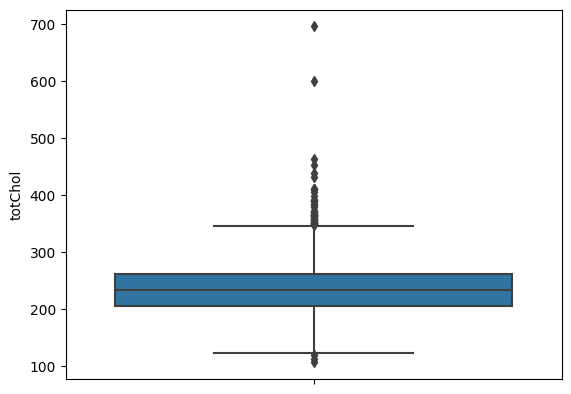

In [17]:
sns.boxplot(y=df['totChol'])

In [18]:
q1=df['totChol'].quantile(0.25)
q2=df['totChol'].quantile(0.5)
q3=df['totChol'].quantile(0.75)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
mean=df[(df['totChol']<upper_tail) | (df['totChol']>lower_tail)]['totChol'].mean()
for j,i in np.ndenumerate(df['totChol']):
    if i>upper_tail or i<lower_tail:
        df['totChol'].replace({i:mean},inplace=True)

<Axes: ylabel='totChol'>

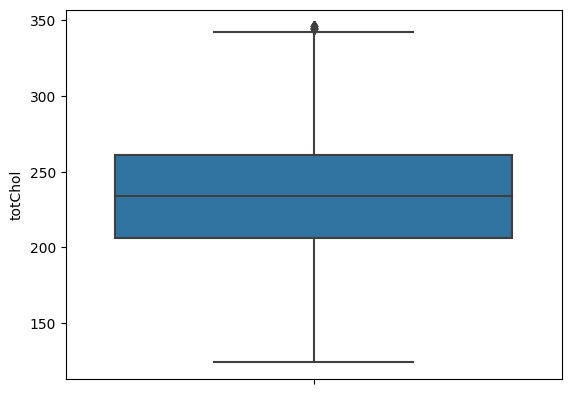

In [19]:
sns.boxplot(y=df['totChol'])

<Axes: ylabel='sysBP'>

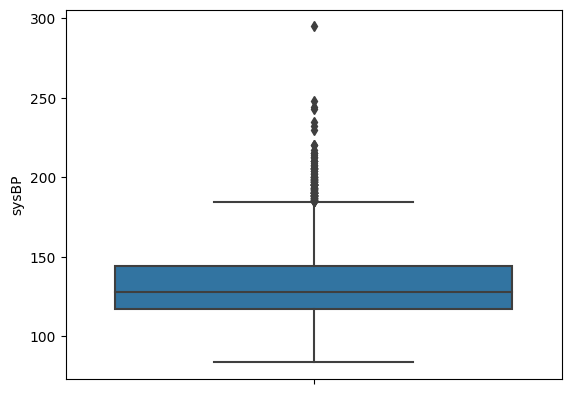

In [20]:
sns.boxplot(y=df['sysBP'])

In [21]:
q1=df['sysBP'].quantile(0.25)
q2=df['sysBP'].quantile(0.5)
q3=df['sysBP'].quantile(0.75)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
mean=df[(df['sysBP']<upper_tail) | (df['sysBP']>lower_tail)]['sysBP'].mean()
for j,i in np.ndenumerate(df['sysBP']):
    if i>upper_tail or i<lower_tail:
        df['sysBP'].replace({i:mean},inplace=True)

<Axes: ylabel='sysBP'>

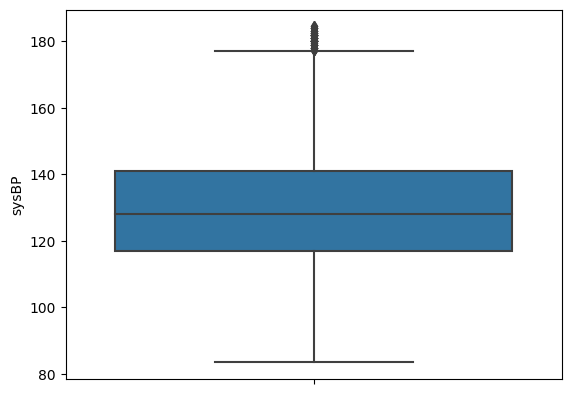

In [22]:
sns.boxplot(y=df['sysBP'])

<Axes: ylabel='diaBP'>

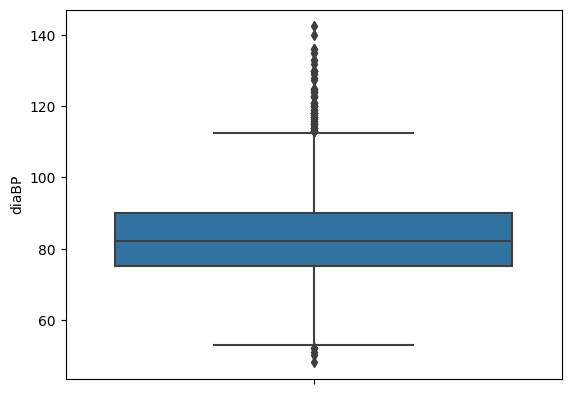

In [23]:
sns.boxplot(y=df['diaBP'])

In [24]:
q1=df['diaBP'].quantile(0.25)
q2=df['diaBP'].quantile(0.5)
q3=df['diaBP'].quantile(0.75)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
mean=df[(df['diaBP']<upper_tail) | (df['diaBP']>lower_tail)]['diaBP'].mean()
for j,i in np.ndenumerate(df['diaBP']):
    if i>upper_tail or i<lower_tail:
        df['diaBP'].replace({i:mean},inplace=True)

<Axes: ylabel='diaBP'>

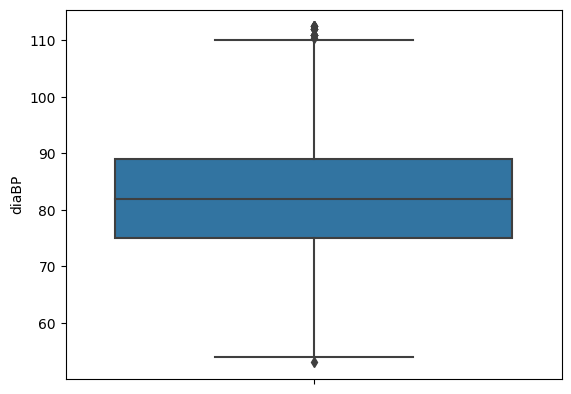

In [25]:
sns.boxplot(y=df['diaBP'])

<Axes: ylabel='BMI'>

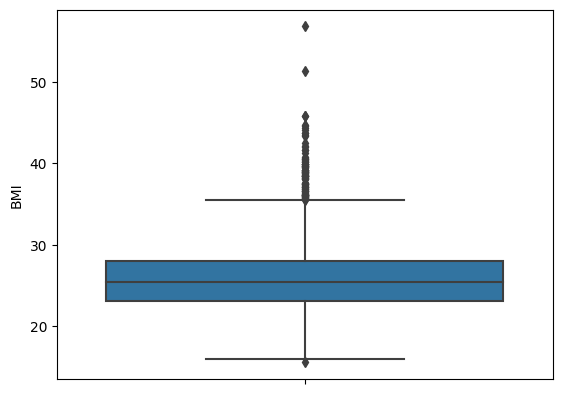

In [26]:
sns.boxplot(y=df['BMI'])

In [27]:
q1=df['BMI'].quantile(0.25)
q2=df['BMI'].quantile(0.5)
q3=df['BMI'].quantile(0.75)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
mean=df[df['BMI']<upper_tail]['BMI'].mean()
for j,i in np.ndenumerate(df['BMI']):
    if i>upper_tail:
        df['BMI'].replace({i:mean},inplace=True)

<Axes: ylabel='BMI'>

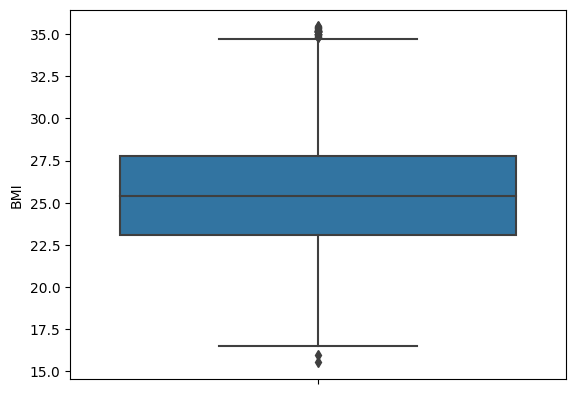

In [28]:
sns.boxplot(y=df['BMI'])

<Axes: ylabel='heartRate'>

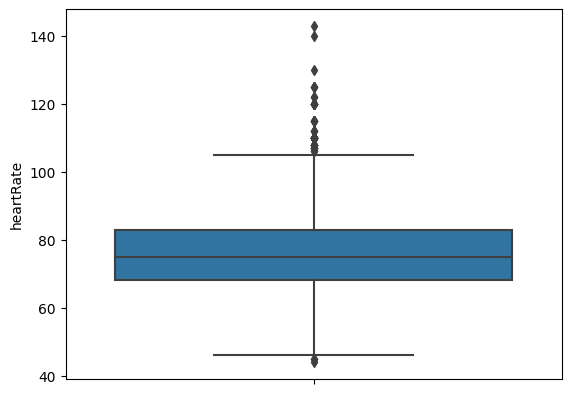

In [29]:
sns.boxplot(y=df['heartRate'])

In [30]:
q1=df['heartRate'].quantile(0.25)
q2=df['heartRate'].quantile(0.5)
q3=df['heartRate'].quantile(0.75)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
mean=df[df['heartRate']<upper_tail]['heartRate'].mean()
for j,i in np.ndenumerate(df['heartRate']):
    if i>upper_tail:
        df['heartRate'].replace({i:mean},inplace=True)

<Axes: ylabel='heartRate'>

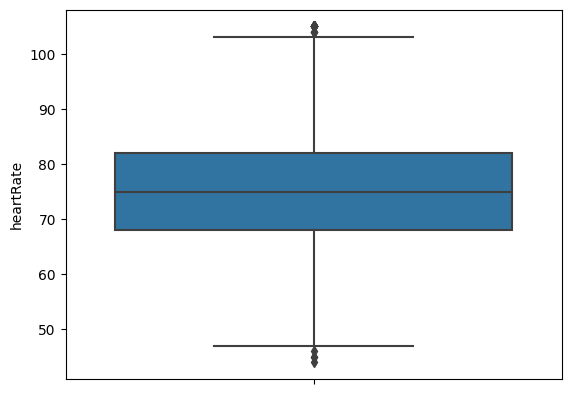

In [31]:
sns.boxplot(y=df['heartRate'])

<Axes: ylabel='glucose'>

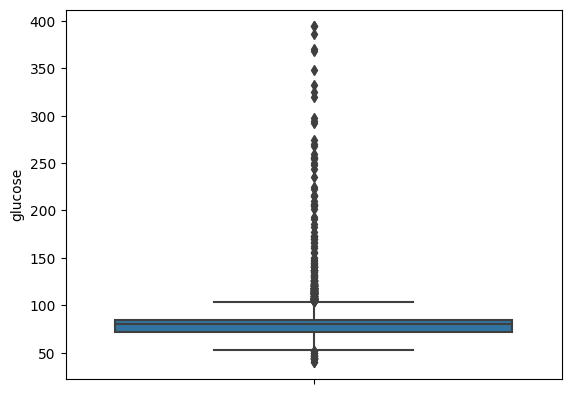

In [32]:
sns.boxplot(y=df['glucose'])

In [33]:
q1=df['glucose'].quantile(0.25)
q2=df['glucose'].quantile(0.5)
q3=df['glucose'].quantile(0.75)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
mean=df[(df['glucose']<upper_tail) | (df['glucose']>lower_tail)]['glucose'].mean()
for j,i in np.ndenumerate(df['glucose']):
    if i>upper_tail or i<lower_tail:
        df['glucose'].replace({i:mean},inplace=True)

<Axes: ylabel='glucose'>

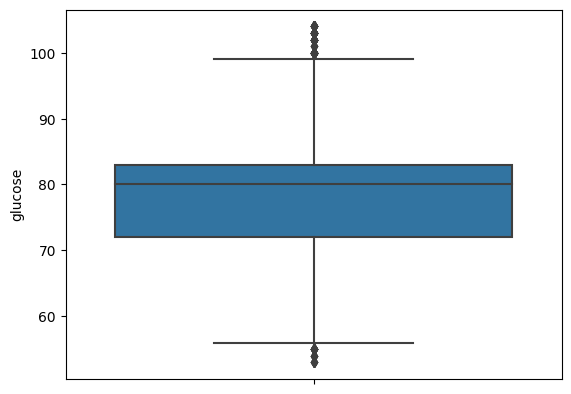

In [34]:
sns.boxplot(y=df['glucose'])

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [36]:
x=df.drop('TenYearCHD',axis=1)
y=df['TenYearCHD']

In [37]:
mms=MinMaxScaler()
x_scaled=mms.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)

In [38]:
# std=StandardScaler()
# x_scaled=std.fit_transform(x)
# x=pd.DataFrame(x_scaled,columns=x.columns)

In [39]:
from imblearn.over_sampling import RandomOverSampler

In [40]:
ros=RandomOverSampler()
x_ros,y_ros=ros.fit_resample(x,y)

In [41]:
xtr,xte,ytr,yte=train_test_split(x_ros,y_ros,train_size=0.8,stratify=y_ros,random_state=1)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn.naive_bayes import GaussianNB

In [43]:
lore=LogisticRegression()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
xgbc=XGBClassifier()
xgbrf=XGBRFClassifier()
gnb=GaussianNB()

In [44]:
lore.fit(xtr,ytr)
knn.fit(xtr,ytr)
dtc.fit(xtr,ytr)
rfc.fit(xtr,ytr)
abc.fit(xtr,ytr)
gbc.fit(xtr,ytr)
xgbc.fit(xtr,ytr)
xgbrf.fit(xtr,ytr)
gnb.fit(xtr,ytr)

GaussianNB()

In [45]:
ypredlore=lore.predict(xte)
ypredknn=knn.predict(xte)
ypreddtc=dtc.predict(xte)
ypredrfc=rfc.predict(xte)
ypredabc=abc.predict(xte)
ypredgbc=gbc.predict(xte)
ypredxgbc=xgbc.predict(xte)
ypredxgbrf=xgbrf.predict(xte)
ypredgnb=gnb.predict(xte)

In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(ypredlore,yte))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67       657
           1       0.73      0.67      0.70       781

    accuracy                           0.69      1438
   macro avg       0.69      0.69      0.69      1438
weighted avg       0.69      0.69      0.69      1438



In [48]:
print(classification_report(ypredknn,yte))

              precision    recall  f1-score   support

           0       0.64      0.89      0.75       517
           1       0.92      0.72      0.81       921

    accuracy                           0.78      1438
   macro avg       0.78      0.81      0.78      1438
weighted avg       0.82      0.78      0.79      1438



In [49]:
print(classification_report(ypreddtc,yte))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       606
           1       0.99      0.86      0.92       832

    accuracy                           0.91      1438
   macro avg       0.91      0.92      0.91      1438
weighted avg       0.93      0.91      0.91      1438



In [50]:
print(classification_report(ypredrfc,yte))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       684
           1       0.99      0.95      0.97       754

    accuracy                           0.97      1438
   macro avg       0.97      0.97      0.97      1438
weighted avg       0.97      0.97      0.97      1438



In [51]:
print(classification_report(ypredabc,yte))

              precision    recall  f1-score   support

           0       0.64      0.69      0.66       665
           1       0.71      0.66      0.69       773

    accuracy                           0.67      1438
   macro avg       0.67      0.68      0.67      1438
weighted avg       0.68      0.67      0.68      1438



In [52]:
print(classification_report(ypredgbc,yte))

              precision    recall  f1-score   support

           0       0.66      0.74      0.70       644
           1       0.77      0.70      0.73       794

    accuracy                           0.72      1438
   macro avg       0.72      0.72      0.72      1438
weighted avg       0.72      0.72      0.72      1438



In [53]:
print(classification_report(ypredxgbc,yte))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       626
           1       0.98      0.87      0.92       812

    accuracy                           0.92      1438
   macro avg       0.92      0.92      0.92      1438
weighted avg       0.92      0.92      0.92      1438



In [54]:
print(classification_report(ypredxgbrf,yte))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72       599
           1       0.83      0.71      0.77       839

    accuracy                           0.75      1438
   macro avg       0.75      0.75      0.74      1438
weighted avg       0.76      0.75      0.75      1438



In [55]:
print(classification_report(ypredgnb,yte))

              precision    recall  f1-score   support

           0       0.86      0.57      0.69      1086
           1       0.35      0.72      0.47       352

    accuracy                           0.61      1438
   macro avg       0.61      0.64      0.58      1438
weighted avg       0.74      0.61      0.63      1438



In [56]:
train=[lore.score(xtr,ytr),knn.score(xtr,ytr),dtc.score(xtr,ytr),rfc.score(xtr,ytr),abc.score(xtr,ytr),
gbc.score(xtr,ytr),xgbc.score(xtr,ytr),xgbrf.score(xtr,ytr),gnb.score(xtr,ytr)]

In [57]:
test=[lore.score(xte,yte),knn.score(xte,yte),dtc.score(xte,yte),rfc.score(xte,yte),abc.score(xte,yte),
gbc.score(xte,yte),xgbc.score(xte,yte),xgbrf.score(xte,yte),gnb.score(xte,yte)]

In [58]:
accuracies=pd.DataFrame({'train_accuracy':train,'test_accuracy':test})

In [59]:
accuracies.index=['lore','knn','dtc','rfc','abc','gbc','xgbc','xgbrf','gnb']

In [60]:
accuracies

,train_accuracy,test_accuracy
lore,0.683130,0.685675
knn,0.865043,0.781641
dtc,1.000000,0.914465
rfc,1.000000,0.968707
abc,0.698609,0.674548
gbc,0.751304,0.716968
xgbc,0.997043,0.915855
xgbrf,0.778261,0.745480
gnb,0.608174,0.605702


In [61]:
import pickle
with open('xgboost.pkl', 'wb') as file:
    # Use pickle.dump to serialize and save the object to the file
    pickle.dump(xgbc, file)